# Assessing the pCO2 Data for the CE01ISSM-00011 7 m Platform (NSIF)

This notebook will explore ways to assess the SAMI2-pCO2 data, identify issues and potentially correct errors.

In [1]:
import dateutil.parser as parser
import os
import pytz
import xarray as xr

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-white')

from ooi_data_explorations.common import get_deployment_dates, m2m_request, m2m_collect
from ooi_data_explorations.uncabled.process_pco2w import pco2w_datalogger, pco2w_instrument

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uncomment and run the following pip commands if the above imports fail
#pip install -r requirements.txt
#pip install -e ../python

## Set up needed parameters to request the deployment 11 PCO2W data from the CE01ISSM midwater platform

In [2]:
site = 'CE01ISSM'           # OOI Net site designator
node = 'RID16'              # OOI Net node designator
sensor = '05-PCO2WB000'     # OOI Net sensor designator
streams = ['pco2w_abc_dcl_instrument', 'pco2w_abc_dcl_instrument_recovered', 'pco2w_abc_instrument']
methods = ['telemetered', 'recovered_host', 'recovered_inst']
deploy = 11
start, stop = get_deployment_dates(site, node, sensor, deploy)

## Create a simple function to request the data based on the different streams and methods

In [3]:
def request_data(site, node, sensor, method, stream, deploy, start, stop):
    r = m2m_request(site, node, sensor, method, stream, start, stop)
    data = m2m_collect(r, '^(?!.*blank).*deployment0011.*PCO2W.*nc$')
    return data

data = [request_data(site, node, sensor, methods[i], streams[i], deploy, start, stop) for i in range(3)]

Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: telemetered
	stream: pco2w_abc_dcl_instrument
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting:   4%|▍         | 18/400 [00:51<18:14,  2.86s/it]


KeyboardInterrupt: 

In [3]:
telem = pco2w_datalogger(data[0])
telem

<xarray.Dataset>
Dimensions:                             (duplicates: 2, time: 2222)
Coordinates:
  * time                                (time) datetime64[ns] 2019-04-20T03:3...
  * duplicates                          (duplicates) int32 0 1
Data variables:
    thermistor_temperature_qc_executed  (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    pco2_seawater_qc_executed           (time) float32 29.0 29.0 ... 29.0 29.0
    absorbance_blank_620                (time) int32 20591 20591 ... 17719 17719
    absorbance_ratio_434                (time) int32 1113 1149 ... 2610 2524
    absorbance_ratio_620                (time) int32 19638 18777 ... 8681 8826
    raw_battery_voltage                 (time) int32 3157 3158 ... 3156 3156
    thermistor_temperature_qc_results   (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    internal_timestamp                  (time) float64 1.556e+09 ... 1.572e+09
    pco2_seawater_qc_results            (time) float32 28.0 28.0 ... 29.0 29.0
    absorbance_blank_434                (time) int32 15363 15363 ... 12245 12245
    deployment                          (time) int32 11 11 11 11 ... 11 11 11 11
    thermistor_temperature              (time) float32 11.68 11.64 ... 12.97
    raw_thermistor                      (time) int32 2047 2049 ... 1989 1990
    pco2_seawater                       (time) float32 3.402e+04 ... 846.5
    unique_id                           (time) int32 219 219 219 ... 219 219 219
    dark_reference                      (time, duplicates) int32 75 74 ... 73 75
    dark_signal                         (time, duplicates) int32 86 89 ... 88 88
    reference_434                       (time, duplicates) int32 2941 ... 2924
    signal_434                          (time, duplicates) int32 282 284 ... 528
    reference_620                       (time, duplicates) int32 2099 ... 2104
    signal_620                          (time, duplicates) int32 2514 ... 1186
    battery_voltage                     (time) float32 11.56 11.56 ... 11.56
Attributes:
    node:                               RID16
    comment:                            Data collected from the OOI M2M API a...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             pco2w_abc_dcl_instrument
    featureType:                        timeSeries
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2021-04-23T20:45:20.010990
    keywords:                           
    cdm_data_type:                      Station
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2021-04-23T20:45:20.010988
    id:                                 CE01ISSM-RID16-05-PCO2WB000-telemeter...
    requestUUID:                        e2885fc4-82b0-4c53-8be1-4604d873f1d9
    contributor_role:                   
    summary:                            Dataset Generated by Stream Engine fr...
    keywords_vocabulary:                
    institution:                        Ocean Observatories Initiative
    naming_authority:                   org.oceanobservatories
    infoUrl:                            http://oceanobservatories.org/
    license:                            
    contributor_name:                   
    uuid:                               e2885fc4-82b0-4c53-8be1-4604d873f1d9
    creator_name:                       Ocean Observatories Initiative
    title:                              Data produced by Stream Engine versio...
    sensor:                             05-PCO2WB000
    standard_name_vocabulary:           NetCDF Climate and Forecast (CF) Meta...
    acknowledgement:                    National Science Foundation
    Conventions:                        CF-1.6
    project:

In [4]:
rhost = pco2w_datalogger(data[1])
rhost

<xarray.Dataset>
Dimensions:                             (duplicates: 2, time: 2224)
Coordinates:
  * time                                (time) datetime64[ns] 2019-04-20T03:3...
  * duplicates                          (duplicates) int32 0 1
Data variables:
    thermistor_temperature_qc_executed  (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    pco2_seawater_qc_executed           (time) float32 29.0 29.0 ... 29.0 29.0
    absorbance_blank_620                (time) int32 20591 20591 ... 17719 17719
    absorbance_ratio_434                (time) int32 1113 1149 ... 2561 2574
    absorbance_ratio_620                (time) int32 19638 18777 ... 8429 8363
    raw_battery_voltage                 (time) int32 3157 3158 ... 3156 3157
    thermistor_temperature_qc_results   (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    internal_timestamp                  (time) float64 1.556e+09 ... 1.572e+09
    pco2_seawater_qc_results            (time) float32 28.0 28.0 ... 29.0 29.0
    absorbance_blank_434                (time) int32 15363 15363 ... 12245 12245
    deployment                          (time) int32 11 11 11 11 ... 11 11 11 11
    thermistor_temperature              (time) float32 11.68 11.64 ... 13.04
    raw_thermistor                      (time) int32 2047 2049 ... 1990 1987
    pco2_seawater                       (time) float32 3.402e+04 ... 758.2
    unique_id                           (time) int32 219 219 219 ... 219 219 219
    dark_reference                      (time, duplicates) int32 75 74 ... 73 74
    dark_signal                         (time, duplicates) int32 86 89 ... 89 87
    reference_434                       (time, duplicates) int32 2941 ... 2925
    signal_434                          (time, duplicates) int32 282 284 ... 535
    reference_620                       (time, duplicates) int32 2099 ... 2101
    signal_620                          (time, duplicates) int32 2514 ... 1127
    battery_voltage                     (time) float32 11.56 11.56 ... 11.56
Attributes:
    node:                               RID16
    comment:                            Data collected from the OOI M2M API a...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             pco2w_abc_dcl_instrument_recovered
    featureType:                        timeSeries
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2021-04-23T20:46:20.742815
    keywords:                           
    cdm_data_type:                      Station
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2021-04-23T20:46:20.742812
    id:                                 CE01ISSM-RID16-05-PCO2WB000-recovered...
    requestUUID:                        4f1fa97e-d051-42a8-8684-5cf3ca40c411
    contributor_role:                   
    summary:                            Dataset Generated by Stream Engine fr...
    keywords_vocabulary:                
    institution:                        Ocean Observatories Initiative
    naming_authority:                   org.oceanobservatories
    infoUrl:                            http://oceanobservatories.org/
    license:                            
    contributor_name:                   
    uuid:                               4f1fa97e-d051-42a8-8684-5cf3ca40c411
    creator_name:                       Ocean Observatories Initiative
    title:                              Data produced by Stream Engine versio...
    sensor:                             05-PCO2WB000
    standard_name_vocabulary:           NetCDF Climate and Forecast (CF) Meta...
    acknowledgement:                    National Science Foundation
    Conventions:                        CF-1.6

In [5]:
rinst = pco2w_instrument(data[2])
rinst

<xarray.Dataset>
Dimensions:                             (duplicates: 2, time: 3535)
Coordinates:
  * time                                (time) datetime64[ns] 2019-04-20T03:3...
  * duplicates                          (duplicates) int32 0 1
Data variables:
    thermistor_temperature_qc_executed  (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    pco2_seawater_qc_executed           (time) float32 29.0 29.0 ... 29.0 29.0
    absorbance_blank_620                (time) int32 20591 20591 ... 17719 17719
    absorbance_ratio_434                (time) int32 1113 1149 ... 2561 2574
    absorbance_ratio_620                (time) int32 19638 18777 ... 8429 8363
    raw_battery_voltage                 (time) int32 3157 3158 ... 3156 3157
    thermistor_temperature_qc_results   (time) float32 1.0 1.0 1.0 ... 1.0 1.0
    pco2_seawater_qc_results            (time) float32 28.0 28.0 ... 29.0 29.0
    absorbance_blank_434                (time) int32 15363 15363 ... 12245 12245
    deployment                          (time) int32 11 11 11 11 ... 11 11 11 11
    thermistor_temperature              (time) float32 11.68 11.64 ... 13.04
    raw_thermistor                      (time) int32 2047 2049 ... 1990 1987
    pco2_seawater                       (time) float32 3.402e+04 ... 758.2
    dark_reference                      (time, duplicates) int32 75 74 ... 73 74
    dark_signal                         (time, duplicates) int32 86 89 ... 89 87
    reference_434                       (time, duplicates) int32 2941 ... 2925
    signal_434                          (time, duplicates) int32 282 284 ... 535
    reference_620                       (time, duplicates) int32 2099 ... 2101
    signal_620                          (time, duplicates) int32 2514 ... 1127
    battery_voltage                     (time) float32 11.56 11.56 ... 11.56
Attributes:
    node:                               RID16
    comment:                            Data collected from the OOI M2M API a...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_inst
    stream:                             pco2w_abc_instrument
    featureType:                        timeSeries
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2021-04-23T20:45:08.685034
    keywords:                           
    cdm_data_type:                      Station
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2021-04-23T20:45:08.685028
    id:                                 CE01ISSM-RID16-05-PCO2WB000-recovered...
    requestUUID:                        91875ee0-4b06-47b5-9b30-060174946682
    contributor_role:                   
    summary:                            Dataset Generated by Stream Engine fr...
    keywords_vocabulary:                
    institution:                        Ocean Observatories Initiative
    naming_authority:                   org.oceanobservatories
    infoUrl:                            http://oceanobservatories.org/
    license:                            
    contributor_name:                   
    uuid:                               91875ee0-4b06-47b5-9b30-060174946682
    creator_name:                       Ocean Observatories Initiative
    title:                              Data produced by Stream Engine versio...
    sensor:                             05-PCO2WB000
    standard_name_vocabulary:           NetCDF Climate and Forecast (CF) Meta...
    acknowledgement:                    National Science Foundation
    Conventions:                        CF-1.6
    project:                            Ocean Observatories Initiative
    source:                             CE01ISSM-RID16-05-PCO2WB000-recovered...
    publisher_url:   

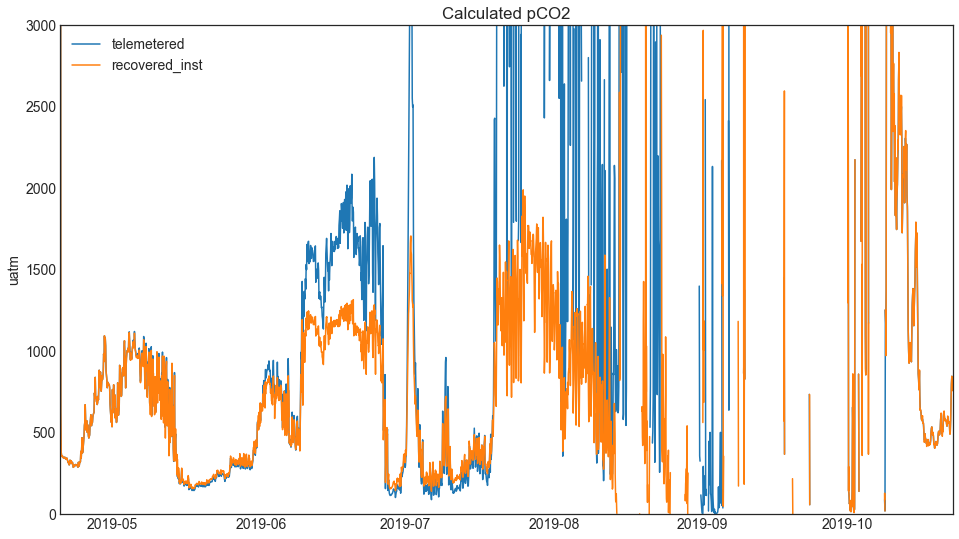

In [6]:
# plot the pCO2 data from the telemetered and recovered instrument data sets. Note, the telemetered and recovered
# host datasets are the same, so we won't use the recovered host data in the cross-comparisons.
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.pco2_seawater, label='telemetered')
plt.plot(rinst.time, rinst.pco2_seawater, label='recovered_inst')
plt.title('Calculated pCO2')
plt.ylabel('uatm')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 3000)
plt.legend()
plt.show()

## Something is wrong! 

The telemetered (and recovered host) and recovered instrument data should be the same, but there very clearly is an issue with a noticeable divergence starting in June and a complete breakdown into noise of the pCO2 estimate in July for the telemetered data and August for the recovered instrument. Both datasets recover in October.

So, let's look at some of the raw data that goes into calculating the pCO2: the 434 and 620 nm absorbance ratios, the thermistor temperature and the the 434 and 620 nm blank absorbance ratios.

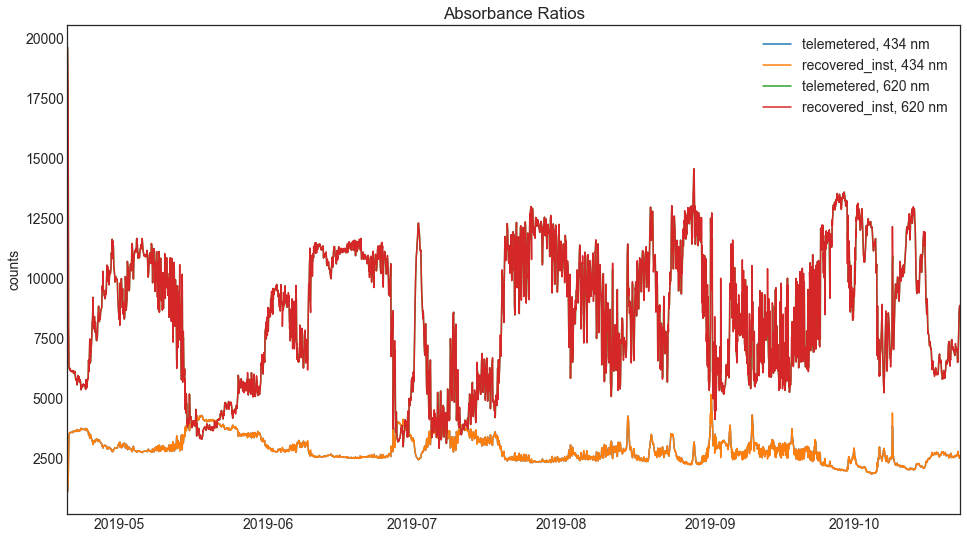

In [7]:
# Absorbance Ratios
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_ratio_434, label='telemetered, 434 nm')
plt.plot(rinst.time, rinst.absorbance_ratio_434, label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_ratio_620, label='telemetered, 620 nm')
plt.plot(rinst.time, rinst.absorbance_ratio_620, label='recovered_inst, 620 nm')
plt.title('Absorbance Ratios')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.legend()
plt.show()

The absorbance ratios look as expected, there really doesn't seem to be any significant issues.

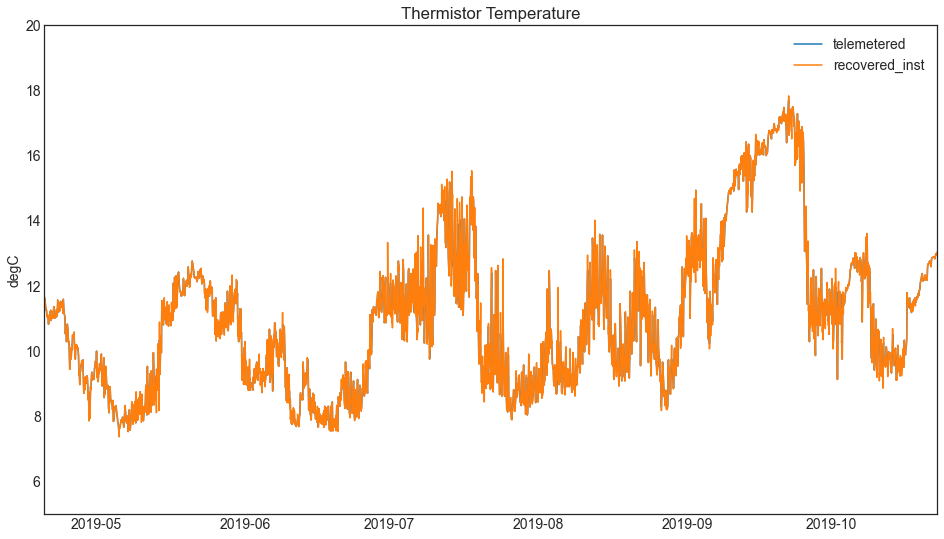

In [8]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.thermistor_temperature, label='telemetered')
plt.plot(rinst.time, rinst.thermistor_temperature, label='recovered_inst')
plt.title('Thermistor Temperature')
plt.ylabel('degC')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(5, 20)
plt.legend()
plt.show()

The thermistor temperatures also look as expected, the values are as expected for this site and the telemetered and recovered instrument data is identical.

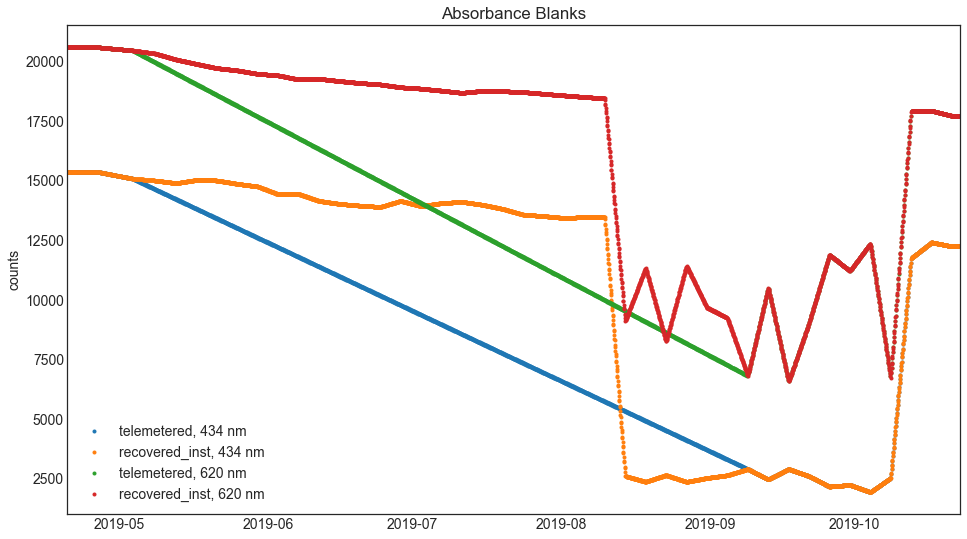

In [9]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_blank_434, '.', label='telemetered, 434 nm')
plt.plot(rinst.time, rinst.absorbance_blank_434, '.', label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_blank_620, '.', label='telemetered, 620 nm')
plt.plot(rinst.time, rinst.absorbance_blank_620, '.', label='recovered_inst, 620 nm')
plt.title('Absorbance Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.legend()
plt.show()

Now we can see the source of the error. The telemetered and recovered instrument datasets are clearly different and there is a problem with the data from mid-August through mid-October. Basically we have two issues. First the solenoid pump and valve that is used to pump either reagent or deionized water through the flow-cell suffered some kind of failure. Additionally though, the OOINet system is incorrectly assigning a blank value to the time series. The system uses linear interpolation to create timeseries of blanks (usually measured every 2-3 days) for the normal measurements. Sometimes we do not always get a blank in the telemetered data. In this case, we got a few blank measurements at the beginning of the record and then nothing until September when the blanks were clearly bad. The system did a linear interpolation from the last good point to the first bad point and spread the badness back in time, which is why the values start to diverge in June and then completely fall apart in July. 

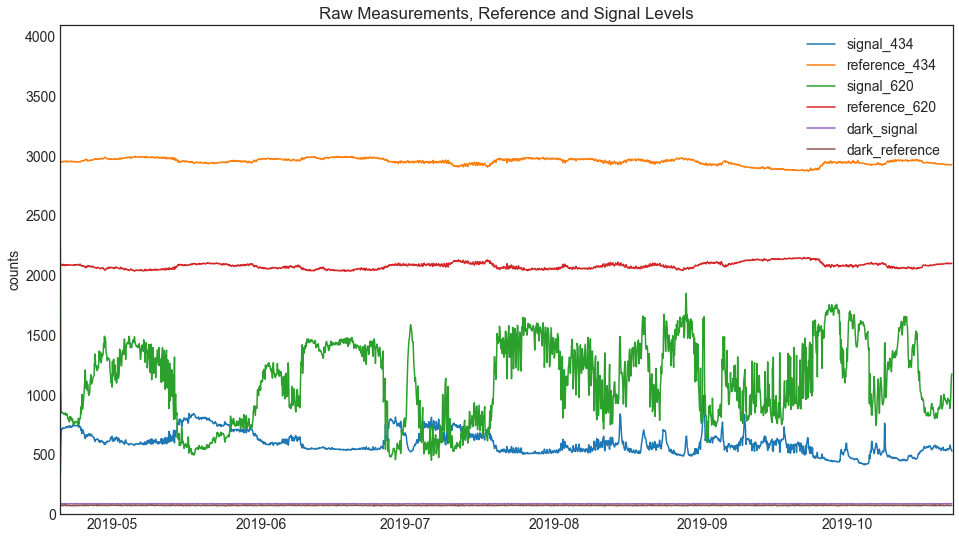

In [10]:
# Just for the sake of completeness, let's look at the other raw measurements
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.signal_434[:, 0] , label='signal_434')
plt.plot(telem.time, telem.reference_434[:, 0], label='reference_434')
plt.plot(telem.time, telem.signal_620[:, 0], label='signal_620')
plt.plot(telem.time, telem.reference_620[:, 0], label='reference_620')
plt.plot(telem.time, telem.dark_signal[:, 0], label='dark_signal')
plt.plot(telem.time, telem.dark_reference[:, 0], label='dark_reference')
plt.title('Raw Measurements, Reference and Signal Levels')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 4096)
plt.legend()
plt.show()

## How to read and assess the raw data

* The reference values track changes in the 434 and 620 nm light sources. These should be greater than 1500 counts and, ideally, should show little variation over the course of the deployment.
* The signal levels will range between 0 and 4096 counts. Values greater than 4000 counts may indicate that the channel is over-saturated with light. Low values (below approximately 200 counts) are suspect, and really low values (less than or equal to the dark signal) would indicate a lamp failure.
* The acceptible range of dark signals is ~50-200 counts. Higher or erratic dark signals indicate a problem.

## Resetting the blanks

Since most of the telemetered data looks good, we need to reset the blanks used by the telemetered data and then we can recalculate the pCO2 estimate. The full blank record is available in the recovered instrument `pco2w_abc_instrument_blank` stream.

In [11]:
# download the blanks
r = m2m_request(site, node, sensor, 'recovered_inst', 'pco2w_abc_instrument_blank', start, stop)
blanks = m2m_collect(r, '.*deployment0011.*PCO2W.*nc$')
blanks

Requesting:
	refdes: CE01ISSM-RID16-05-PCO2WB000
	method: recovered_inst
	stream: pco2w_abc_instrument_blank
	from 2019-04-20T03:01:00.000Z to 2019-10-22T23:57:00.000Z
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


<xarray.Dataset>
Dimensions:                                   (spectrum: 14, time: 42)
Coordinates:
  * spectrum                                  (spectrum) int32 0 1 2 ... 12 13
  * time                                      (time) datetime64[ns] 2019-04-2...
Data variables:
    pco2w_thermistor_temperature_qc_results   (time) float32 1.0 1.0 ... 1.0 1.0
    absorbance_blank_434                      (time) float32 1.536e+04 ... 1....
    record_time                               (time) datetime64[ns] 2019-04-2...
    pco2w_thermistor_temperature_qc_executed  (time) float32 1.0 1.0 ... 1.0 1.0
    deployment                                (time) int32 11 11 11 ... 11 11 11
    record_type                               (time) float32 5.0 5.0 ... 5.0 5.0
    absorbance_blank_620                      (time) float32 2.059e+04 ... 1....
    internal_timestamp                        (time) datetime64[ns] 2019-04-2...
    thermistor_raw                            (time) float32 2.121e+03 ... 2....
    pco2w_thermistor_temperature              (time) float64 10.02 ... 12.7
    voltage_battery                           (time) float32 3.136e+03 ... 3....
    blank_light_measurements                  (time, spectrum) float32 74.0 ....
Attributes:
    node:                               RID16
    comment:                            Data collected from the OOI M2M API a...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_inst
    stream:                             pco2w_abc_instrument_blank
    featureType:                        timeSeries
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2021-04-23T20:46:41.347183
    keywords:                           
    cdm_data_type:                      Station
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2021-04-23T20:46:41.347179
    id:                                 CE01ISSM-RID16-05-PCO2WB000-recovered...
    requestUUID:                        83620c24-335b-4bde-ace2-2adce582c64f
    contributor_role:                   
    summary:                            Dataset Generated by Stream Engine fr...
    keywords_vocabulary:                
    institution:                        Ocean Observatories Initiative
    naming_authority:                   org.oceanobservatories
    infoUrl:                            http://oceanobservatories.org/
    license:                            
    contributor_name:                   
    uuid:                               83620c24-335b-4bde-ace2-2adce582c64f
    creator_name:                       Ocean Observatories Initiative
    title:                              Data produced by Stream Engine versio...
    sensor:                             05-PCO2WB000
    standard_name_vocabulary:           NetCDF Climate and Forecast (CF) Meta...
    acknowledgement:                    National Science Foundation
    Conventions:                        CF-1.6
    project:                            Ocean Observatories Initiative
    source:                             CE01ISSM-RID16-05-PCO2WB000-recovered...
    publisher_url:                      http://oceanobservatories.org/
    creator_url:                        http://oceanobservatories.org/
    nodc_template_version:              NODC_NetCDF_TimeSeries_Orthogonal_Tem...
    subsite:                            CE01ISSM
    processing_level:                   L2
    history:                            2021-04-23T20:46:41.347129 generated ...
    Manufacturer:                       Sunburst Sensors
    ModelNumber:                        SAMI-pCO2
    SerialNumber:                       C0119
    Description:                        pCO2 Water: PCO2W 

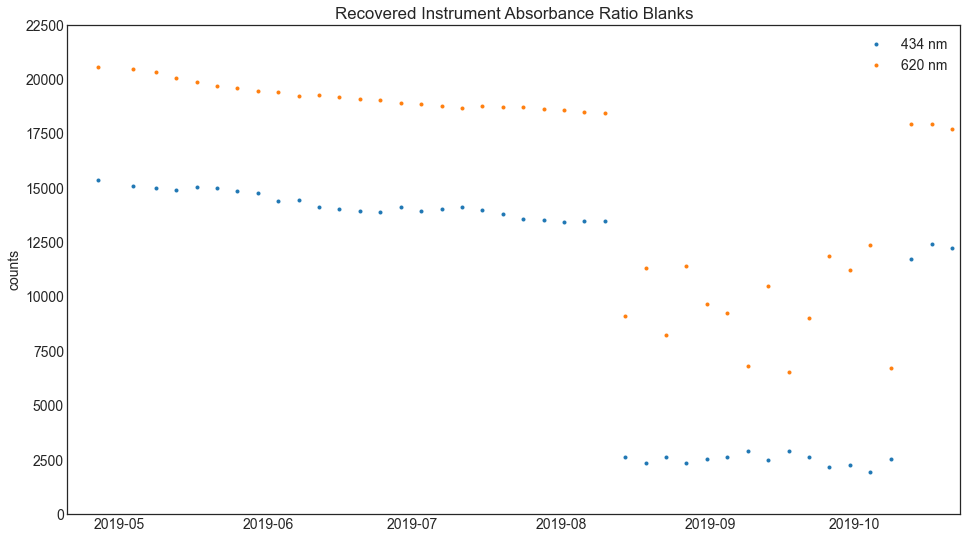

In [12]:
# plot the blanks
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(blanks.time, blanks.absorbance_blank_434, '.', label='434 nm')
plt.plot(blanks.time, blanks.absorbance_blank_620, '.', label='620 nm')
plt.title('Recovered Instrument Absorbance Ratio Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 22500)
plt.legend()
plt.show()

In [13]:
# remove the bad blanks from mid-August through mid-October
clean = blanks.where(blanks.absorbance_blank_434 > 10000, drop=True)

# use a forward and backward filling method to create arrays of blanks comparable to 
# how the vendor code would manage the blanks
blanks_434 = clean['absorbance_blank_434'].reindex(time=telem['time'], method='ffill')
blanks_434 = blanks_434.bfill(dim='time')
telem['absorbance_blank_434'] = blanks_434

blanks_620 = clean['absorbance_blank_620'].reindex(time=telem['time'], method='ffill')
blanks_620 = blanks_620.bfill(dim='time')
telem['absorbance_blank_620'] = blanks_620

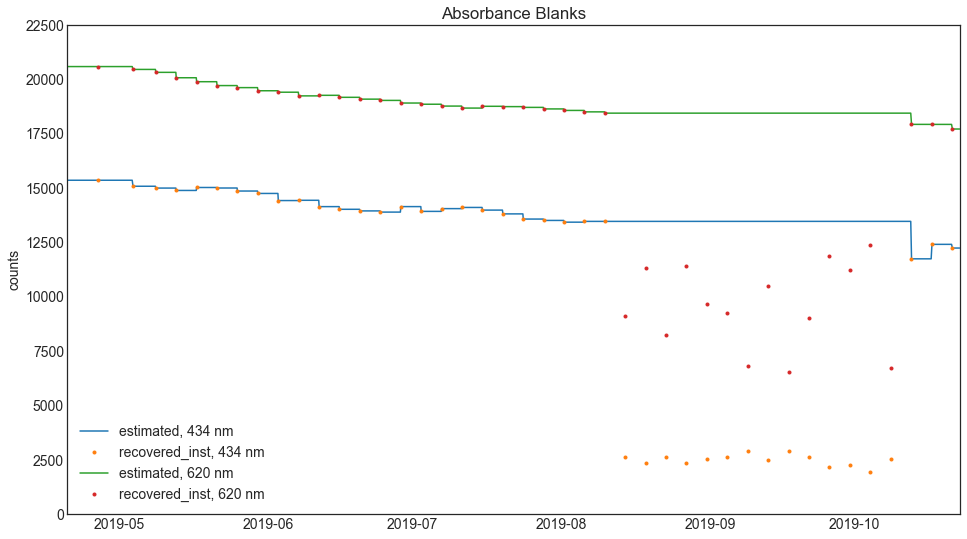

In [14]:
# plot the new blank arrays and the cleaned up recovered instrument blank arrays
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.plot(telem.time, telem.absorbance_blank_434, label='estimated, 434 nm')
plt.plot(blanks.time, blanks.absorbance_blank_434, '.', label='recovered_inst, 434 nm')
plt.plot(telem.time, telem.absorbance_blank_620, label='estimated, 620 nm')
plt.plot(blanks.time, blanks.absorbance_blank_620, '.', label='recovered_inst, 620 nm')
plt.title('Absorbance Blanks')
plt.ylabel('counts')
plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
plt.ylim(0, 22500)
plt.legend()
plt.show()

In [15]:
# load the function to derive pCO2 from the pyseas library
# from pyseas.data.co2_functions import co2_pco2wat

# # copy/paste the calibration coefficients from the online repo:
# # https://github.com/oceanobservatories/asset-management/blob/master/calibration/PCO2WB/CGINS-PCO2WB-C0119__20190122.csv
# cala = 0.0747
# calb = 0.3956
# calc = -1.1472
# calt = 15.8
# k434 = 1.0602
# k620 = 1.3553

#TODO: fix co2_pco2wat -- there are scipy.log10() references in it that must be switched to np.log10()
# # recalculate the pCO2 values for the telemetered data using the new blanks
# telem['pco2_seawater'] = co2_pco2wat(telem.absorbance_ratio_434, telem.absorbance_ratio_620, 
#                                      telem.thermistor_temperature, calt, cala, calb, calc, 
#                                      telem.absorbance_blank_434 / 16834., telem.absorbance_blank_620 / 16834.)

In [16]:
# # Load recovered instrument data run through the vendor code to cross-compare estimates of pCO2
# import pandas as pd
# import datetime
# vendor = pd.read_csv('ce01issm_pco2w_C0119_converted_2019-10-31.csv')
# vendor.index = pd.to_datetime(vendor['Date']) - datetime.timedelta(days=1)

In [17]:
# # remove the bad data from the recovered instrument data, to make plot comparisons easier
# rinst = rinst.where(rinst.absorbance_blank_434 > 10000, drop=True)

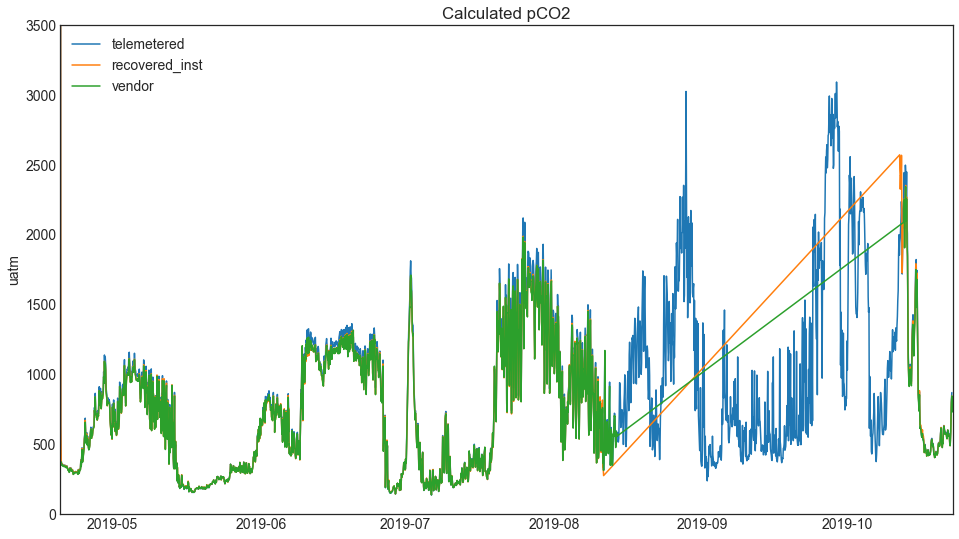

In [18]:
# # now plot the different estimates of pCO2
# plt.figure(figsize=(16,9))
# plt.rcParams.update({'font.size': 14})
# plt.plot(telem.time, telem.pco2_seawater, label='telemetered')
# plt.plot(rinst.time, rinst.pco2_seawater, label='recovered_inst')
# plt.plot(vendor.index, vendor['CO2'], label='vendor')
# plt.title('Calculated pCO2')
# plt.ylabel('uatm')
# plt.xlim(parser.parse(start).astimezone(pytz.utc), parser.parse(stop).astimezone(pytz.utc))
# plt.ylim(0, 3500)
# plt.legend()
# plt.show()

## The pCO2 data is cleaned up and in agreement

All three sources of calculated pCO2 are now in agreement, with the minor differences between them explainable by how the blanks were handled/created. Indeed, we've even managed to fill in the period of missing data due to the bad blanks. Note, however, that the same solenoid pump is used to flush the flow-cell with reagent and DI water. In this case, it looks like it was stuck and DI water was never flushed through to calculate a true blank. But, I'm not 100% certain the reagent was flushing properly, either. I would consider the time we managed to fill in as suspect.